In [1]:
using SymPy
using PyPlot

In [104]:
x,y,z = Sym("x"), Sym("y"), Sym("z");
E, ν = Sym("E"), Sym("nu")
ux, uy = Sym("u_x"), Sym("u_y")

(u_x,u_y)

In [105]:
f = simplify(E / ((1+ν) * (1-2ν)));
G = simplify(E / (2(1 + ν)))
λ = simplify(f * ν);
M = simplify(f * (1 - ν));

In [106]:
D = [M    λ     0;
     λ    M     0;
     0    0     G;]

3x3 Array{SymPy.Sym,2}
[     E*(nu - 1)             -E*nu                   ]
[-------------------  -------------------      0     ]
[(nu + 1)*(2*nu - 1)  (nu + 1)*(2*nu - 1)            ]
[                                                    ]
[       -E*nu              E*(nu - 1)                ]
[-------------------  -------------------      0     ]
[(nu + 1)*(2*nu - 1)  (nu + 1)*(2*nu - 1)            ]
[                                                    ]
[                                              E     ]
[         0                    0           ----------]
[                                          2*(nu + 1)]

In [107]:
ϵ = [Derivative(ux, x);
     Derivative(uy, y);
     1/2 * (Derivative(ux, y) + Derivative(uy, x))]

3-element Array{SymPy.Sym,1}
[         d               ]
[         --(u_x)         ]
[         dx              ]
[                         ]
[         d               ]
[         --(u_y)         ]
[         dy              ]
[                         ]
[    d             d      ]
[0.5*--(u_x) + 0.5*--(u_y)]
[    dy            dx     ]

In [108]:
σ = D * ϵ

3-element Array{SymPy.Sym,1}
[           d                        d      ]
[      E*nu*--(u_y)       E*(nu - 1)*--(u_x)]
[           dy                       dx     ]
[- ------------------- + -------------------]
[  (nu + 1)*(2*nu - 1)   (nu + 1)*(2*nu - 1)]
[                                           ]
[           d                        d      ]
[      E*nu*--(u_x)       E*(nu - 1)*--(u_y)]
[           dx                       dy     ]
[- ------------------- + -------------------]
[  (nu + 1)*(2*nu - 1)   (nu + 1)*(2*nu - 1)]
[                                           ]
[         /    d             d      \       ]
[       E*|0.5*--(u_x) + 0.5*--(u_y)|       ]
[         \    dy            dx     /       ]
[       -----------------------------       ]
[                 2*(nu + 1)                ]

$\mathbf{f}_i = \mathbf{\sigma}_{ij,j}$

In [199]:
f = σij_j = [Derivative(σ[1], x) + Derivative(σ[3], y);
             Derivative(σ[3], x) + Derivative(σ[2], y)]

2-element Array{SymPy.Sym,1}
[  /  /    d             d      \\     /           d                        d 
[  |E*|0.5*--(u_x) + 0.5*--(u_y)||     |      E*nu*--(u_y)       E*(nu - 1)*--
[d |  \    dy            dx     /|   d |           dy                       dx
[--|-----------------------------| + --|- ------------------- + --------------
[dy\          2*(nu + 1)         /   dx\  (nu + 1)*(2*nu - 1)   (nu + 1)*(2*nu
[                                                                             
[  /  /    d             d      \\     /           d                        d 
[  |E*|0.5*--(u_x) + 0.5*--(u_y)||     |      E*nu*--(u_x)       E*(nu - 1)*--
[d |  \    dy            dx     /|   d |           dx                       dy
[--|-----------------------------| + --|- ------------------- + --------------
[dx\          2*(nu + 1)         /   dy\  (nu + 1)*(2*nu - 1)   (nu + 1)*(2*nu

     \]
(u_x)|]
     |]
-----|]
 - 1)/]
      ]
     \]
(u_y)|]
     |]
-----|]
 - 1)/]

Give weird expressions to field and parameters

In [286]:
E0, u0, ν0, R = Sym("E_0"), Sym("u_0"), Sym("nu_0"), Sym("R");
ux_MMS = u0 * ( 1 + sin(x/R)^2*sin(2*y/R)^2)
uy_MMS = u0 * (1 + sin(x/R)^2*sin(2*y/R)^2)
#uy_MMS = u0 * (1 + sin(2*x/R)^2*cos(4*y/R)^2)
E_MMS = E0 #* (1 + sqrt(x^2 + 2y^2) / R)
ν_MMS = ν0 #* (1 + sqrt(3x^2 + 4y^2) / R)
display(ux_MMS)
display(uy_MMS)
display(E_MMS)
display(ν_MMS)

    /   2/x\    2/2*y\    \
u_0*|sin |-|*sin |---| + 1|
    \    \R/     \ R /    /

    /   2/x\    2/2*y\    \
u_0*|sin |-|*sin |---| + 1|
    \    \R/     \ R /    /

E_0

nu_0

Substitute the force with the expressions

In [287]:
f_MMS = map(simplify, subs(f, (E, E_MMS), (ν, ν_MMS), (ux, ux_MMS), (uy, uy_MMS)))

2x1 Array{SymPy.Sym,2}
[  /         /d /    /   2/x\    2/2*y\    \\   d /    /   2/x\    2/2*y\    \
[  |0.25*E_0*|--|u_0*|sin |-|*sin |---| + 1|| + --|u_0*|sin |-|*sin |---| + 1|
[d |         \dx\    \    \R/     \ R /    //   dy\    \    \R/     \ R /    /
[--|--------------------------------------------------------------------------
[dy\                                  nu_0 + 1                                
[                                                                             
[  /         /d /    /   2/x\    2/2*y\    \\   d /    /   2/x\    2/2*y\    \
[  |0.25*E_0*|--|u_0*|sin |-|*sin |---| + 1|| + --|u_0*|sin |-|*sin |---| + 1|
[d |         \dx\    \    \R/     \ R /    //   dy\    \    \R/     \ R /    /
[--|--------------------------------------------------------------------------
[dx\                                  nu_0 + 1                                

\\\     /    /       d /    /   2/x\    2/2*y\    \\              d /    /   2
|||     |E_0*|- nu_0*--|u_0*

### Perform the derivatives!

In [288]:
f_MMS_done = [doit(f_MMS[1]); doit(f_MMS[2])]

2-element Array{SymPy.Sym,1}
[         /           2/x\    2/2*y\            2/x\    2/2*y\            /x\ 
[         |  8*u_0*sin |-|*sin |---|   8*u_0*sin |-|*cos |---|   8*u_0*sin|-|*
[         |            \R/     \ R /             \R/     \ R /            \R/ 
[0.25*E_0*|- ----------------------- + ----------------------- + -------------
[         |              2                         2                          
[         \             R                         R                           
[-----------------------------------------------------------------------------
[                                               nu_0 + 1                      
[                                                                             
[         /           2/x\    2/2*y\            /x\    /2*y\    /x\    /2*y\  
[         |  2*u_0*sin |-|*sin |---|   8*u_0*sin|-|*sin|---|*cos|-|*cos|---|  
[         |            \R/     \ R /            \R/    \ R /    \R/    \ R /  
[0.25*E_0*|- ----------

### Insert the constants

In [541]:
E00 = 10
nu00 = 0.3
RR = 0.5
u00 = 0.25
f_p = [subs(f_MMS_done[1], (E0, E00), (ν0, nu00), (R, RR), (u0, u00));
     subs(f_MMS_done[2], (E0, E00), (ν0, nu00), (R, RR), (u0, u00))]
u_xp = subs(ux_MMS, (E0, E00), (ν0, nu00), (R, RR), (u0, u00));
u_yp = subs(uy_MMS, (E0, E00), (ν0, nu00), (R, RR), (u0, u00));

In [542]:
# Compile the functions so they don't have to go through the symbolic system
using PyCall
@pyimport sympy.utilities.autowrap as aw
f_p_u = [aw.ufuncify([x.x, y.x], f_p[1].x), aw.ufuncify([x.x, y.x], f_p[2].x)]
u_xp_u = aw.ufuncify([x.x, y.x], u_xp.x)
u_yp_u = aw.ufuncify([x.x, y.x], u_yp.x)

fn (generic function with 1 method)

In [543]:
function computee(f_p_u, xx, yy)
    return f_p_u[1](xx, yy), f_p_u[2](xx, yy)
end

computee (generic function with 1 method)

In [544]:
Nx = Ny = 40
p1 = [-1,-1]
p2 = [ 1, 1]
xsp = linspace(p1[1],p2[1],n)
ysp = linspace(p1[2],p2[2],n)
Z1 = zeros(n,n)
Z2 = zeros(n,n)
for (i, xx) in enumerate(xsp), (j, yy) in enumerate(ysp)
    Z = computee(f_p_u, xx, yy)
    Z1[i,j] = Z[1]
    Z2[i,j] = Z[2]
end
mag = sqrt(Z1.^2 + Z2.^2);

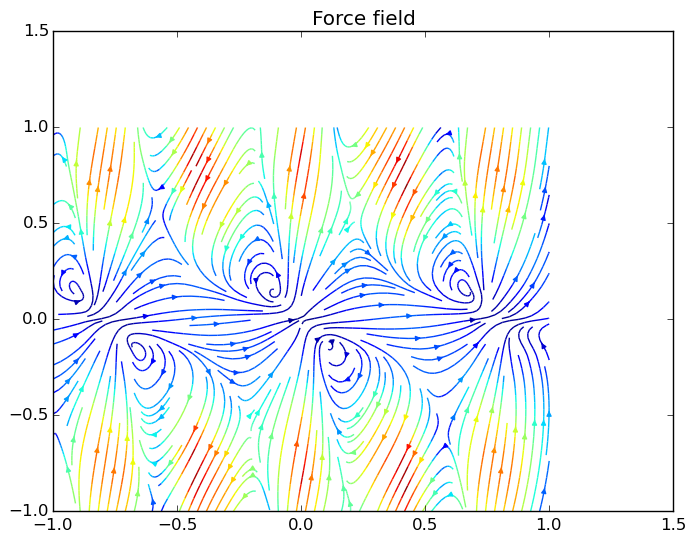

PyObject <matplotlib.text.Text object at 0x7f3a1ae4c6d0>

In [509]:
streamplot(collect(xsp), collect(ysp), Z1, Z2, 2, color=mag)
title("Force field")

In [545]:
Edof, Ex, Ey, B1, B2, B3, B4, coords = JuAFEM.gen_quad_mesh(p1, p2, Nx, Ny, 2);

In [546]:
A = (p2[1] - p1[1]) * (p2[2] - p1[2]) / (Nx * Ny);

In [547]:
for c in 1:size(coords,1)
    #print(size(coords))
    
    coord_x = coords[c,1]
    coord_y = coords[c,2]
    a_ana[c*2-1] = u_xp_u(coord_x, coord_y)
    a_ana[c*2] = u_yp_u(coord_x, coord_y)
end
Ed_ana = JuAFEM.extract_eldisp(Edof, a_ana);

In [548]:
bc_dofs = union(B1[:], B2[:], B3[:], B4[:])
bc = zeros(length(bc_dofs), 2)
for i in 1:size(bc, 1)
    dof = bc_dofs[i]
    bc[i, 1] = dof
    node = div(dof+1, 2)
    coord_x = coords[node, 1]
    coord_y = coords[node, 2]
    x_dof = mod(dof,2) != 0
    if x_dof
        bc[i, 2] = u_xp_u(coord_x, coord_y)
    else
        bc[i, 2] = u_yp_u(coord_x, coord_y)
    end
end

In [560]:
a = start_assemble()
D = hooke(2, E00, nu00)
f_ext = zeros(length(coords))
for e in 1:size(Edof, 1)
    ex = Ex[Edof[e,1], :]'
    ey = Ey[Edof[e,1], :]'
    
    center = [sum(ex, 1)/4 sum(ey, 1)/4]
    eq_sym = computee(f_p_u, center[1], center[2])

    Ke, fe = plani4e(ex, ey, [2, 1, 2], D, [N(eq_sym[1]), N(eq_sym[2])])
    f_ext[Edof[e,2:end]] -= reshape(fe, (1,8))
    assemble(Edof[e, :], a, Ke)
end
K = end_assemble(a);
a_fem, Q = solve_eq_sys(K, f_ext, bc);

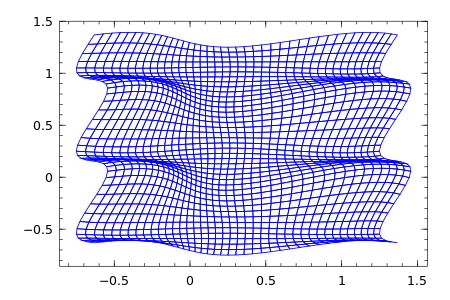

In [561]:
Ed_fem = extract_eldisp(Edof, a_fem);
JuAFEM.eldisp2(Ex, Ey, Ed_fem, [1,2,2])


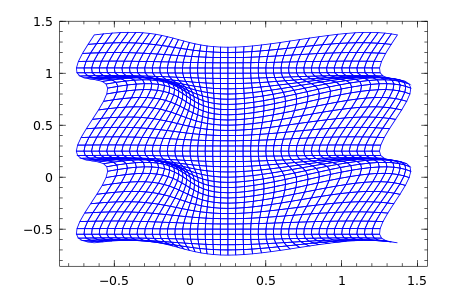

In [562]:
Ed_ana = extract_eldisp(Edof, a_ana);
JuAFEM.eldisp2(Ex, Ey, Ed_ana, [1,2,2])

In [563]:
free = setdiff(1:length(coords), bc[:,1])
norm(a_fem[free] - a_ana[free]) / norm(a_ana[free])

0.054064758727048995